[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mobasserulHaque/Interpretable_ML_Assignment2/blob/main/Interpretable_ML_Assignment2.ipynb)


### Assignment 2 : Interpretable ML

**Mobasserul Haque**

In [1]:
!pip install statsmodels
!pip install pygam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from scipy.stats import chi2_contingency

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from pygam import LogisticGAM, s, f, te

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.5 MB/s eta 0:00:00


In [2]:
# Load the Telco Customer dataset
import pandas as pd

data = pd.read_csv(
    "https://raw.githubusercontent.com/mobasserulHaque/Interpretable_ML_Assignment2/main/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv"
)

print("Dataset loaded successfully!")
print("Shape:", data.shape)
data.head()


Dataset loaded successfully!
Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Cleaning

In [3]:
# get info of our data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# convert TotalCharges to numeric type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# check for duplicates
data.duplicated().sum()

# check if there is any missing values
print(data.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [5]:
data[data['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
# Handling missing values for TotalCharges
data['TotalCharges'] = data['TotalCharges'].fillna(0)
data = data.drop(columns=['customerID'])

We began by exploring the dataset using `head()` and `info()`. This allowed us to confirm there are **7,043 rows and 21 columns**, with most features stored as objects (categorical/text) and a few as numeric. Importantly, we noticed that **TotalCharges** was incorrectly stored as an object, despite being a numeric field.

We converted **TotalCharges** from object to numeric using `pd.to_numeric`. During this conversion, blank or whitespace entries were coerced into `NaN`. This revealed **11 missing values** in TotalCharges.

We then investigated these 11 rows more closely. Our analysis showed that **all 11 customers had tenure = 0**, meaning they were brand-new customers who had not yet been billed. This logically explains why their TotalCharges field was blank.

We also checked for duplicate rows and confirmed there were **no duplicates** in the dataset.

At this point, we identified the **customerID** column as an identifier that carries no predictive value and could potentially cause data leakage. Therefore, we flagged it for removal.

For handling the 11 missing values in **TotalCharges**, we discussed two possible approaches:

- Drop these rows since they are very few (11 out of 7,043 ≈ 0.15%) and add little value to churn prediction.  
- Or alternatively, set **TotalCharges = 0** for these cases, since tenure = 0 implies no charges yet.  

For our analysis, we proceeded with **dropping these rows** to ensure clean and consistent data.


## Exploratory Data Analysis to check Assumptions:

- Perform an exploratory analysis of the dataset to understand the relationships between different features and the target variable (churn). Use appropriate visualizations and statistical methods to determine whether assumptions about linear, logistic, and GAM models are met.

In this section, we explore the dataset to better understand the relationships between features and the target variable (`ChurnFlag`).  

We need to check below:
- Inspect numeric distributions and check for linearity assumptions.  
- Examine correlations between numeric features and the target.  
- Explore categorical variables and their association with churn.  
- Identify potential non-linear effects that may be better captured by GAMs.  


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from scipy.stats import chi2_contingency

# pick the churn column (prefer 'Churn' string; fallback to 'ChurnFlag' 0/1)
if "Churn" in data.columns:
    churn_col = "Churn"
elif "ChurnFlag" in data.columns:
    churn_col = "ChurnFlag"
else:
    raise ValueError("Neither 'Churn' nor 'ChurnFlag' found in data.")

# categorical columns
cat_cols = data.select_dtypes(include=['object']).columns
if churn_col in cat_cols:
    cat_cols = cat_cols.drop(churn_col)

# numeric columns
num_cols = [c for c in ['tenure', 'MonthlyCharges', 'TotalCharges'] if c in data.columns]

print("Churn column:", churn_col)
print("Categorical columns:", list(cat_cols))
print("Numeric columns:", num_cols)


Churn column: Churn
Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numeric columns: ['tenure', 'MonthlyCharges', 'TotalCharges']


### Churn and Target Variable

- First we checked the distribution of churn. The dataset is imbalanced only about 26–27% of customers have churned, while the majority did not.  

- This means accuracy alone won’t be a reliable metric when we build models, since predicting “No churn” all the time would still look ~73% accurate. We’ll need to rely more on metrics like precision, recall, F1-score, or ROC-AUC. Some models may also need class weights or resampling to account for this imbalance.  


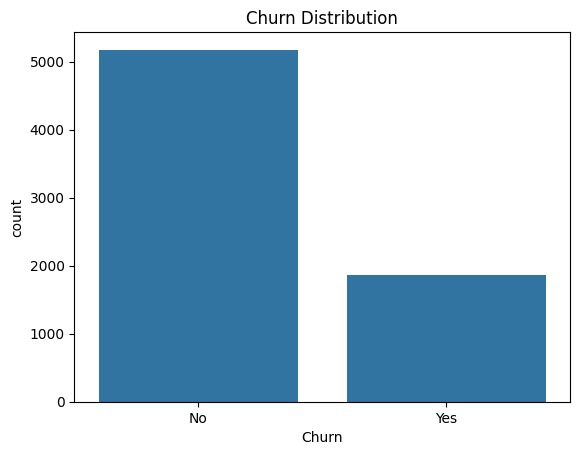

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [8]:
# Class imbalance

sns.countplot(data=data, x=churn_col)
plt.title("Churn Distribution")
plt.show()

print(data[churn_col].value_counts(normalize=True))


## Categorical Features

- We plotted each categorical variable against churn to see which groups have higher churn.  
- Some features (like **Contract type**) clearly showed strong differences: customers on *month-to-month* contracts churn a lot more (43%) compared to 1-year (11%) or 2-year (~3%).  
- **Payment method** also matters – customers paying by *electronic check* churn the most (~45%). In contrast, automatic payments have much lower churn.  
- Features like **gender** didn’t show much difference (p-value ~0.49, not significant). On the other hand, **Partner, Dependents, InternetService, OnlineSecurity, TechSupport**, and several others had p-values < 0.05, making them statistically associated with churn.  
- This means many service-related features (especially internet/tech support related) are important indicators of whether a customer stays or leaves.  


  0%|          | 0/15 [00:00<?, ?it/s]

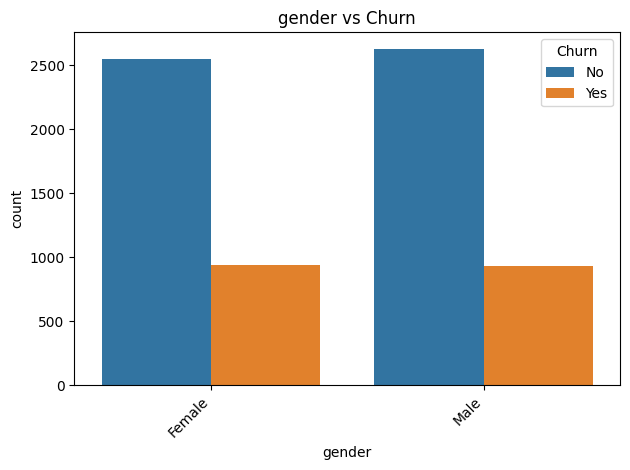

  7%|▋         | 1/15 [00:00<00:04,  3.10it/s]

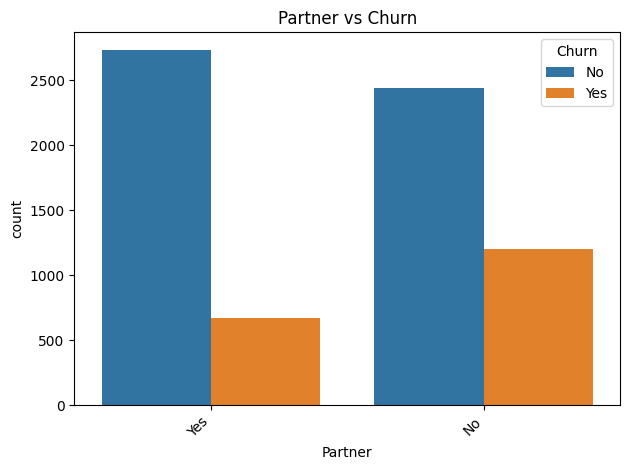

 13%|█▎        | 2/15 [00:00<00:05,  2.55it/s]

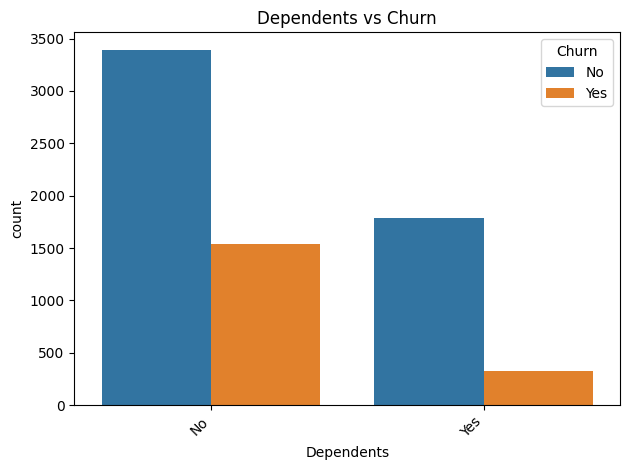

 20%|██        | 3/15 [00:01<00:04,  2.73it/s]

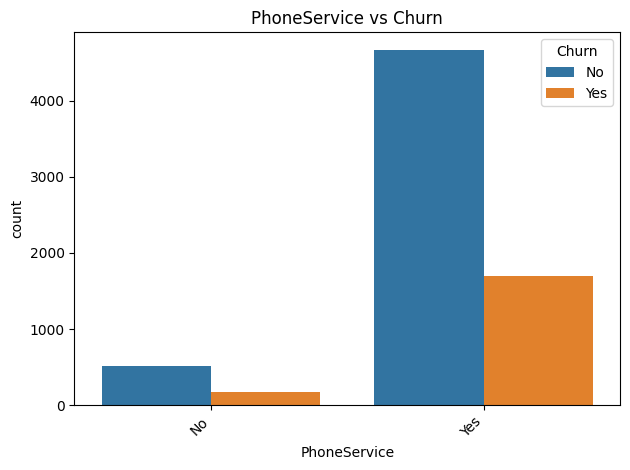

 27%|██▋       | 4/15 [00:01<00:04,  2.56it/s]

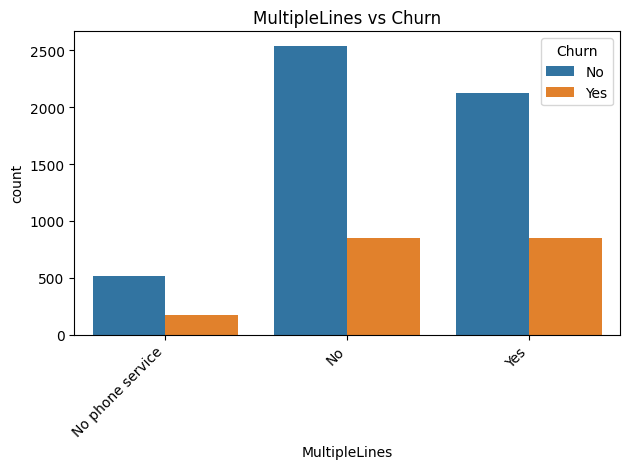

 33%|███▎      | 5/15 [00:01<00:03,  2.57it/s]

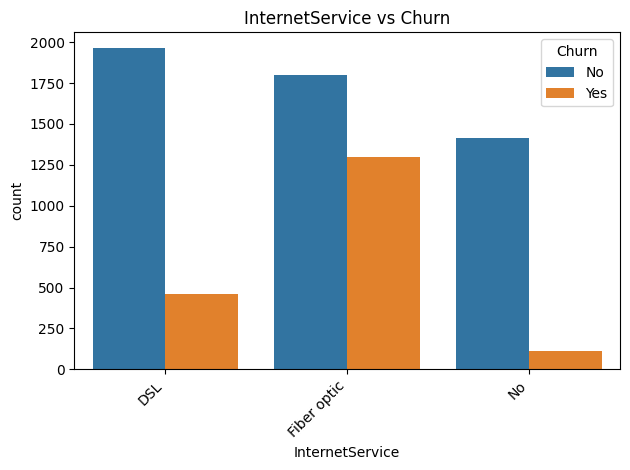

 40%|████      | 6/15 [00:02<00:04,  2.11it/s]

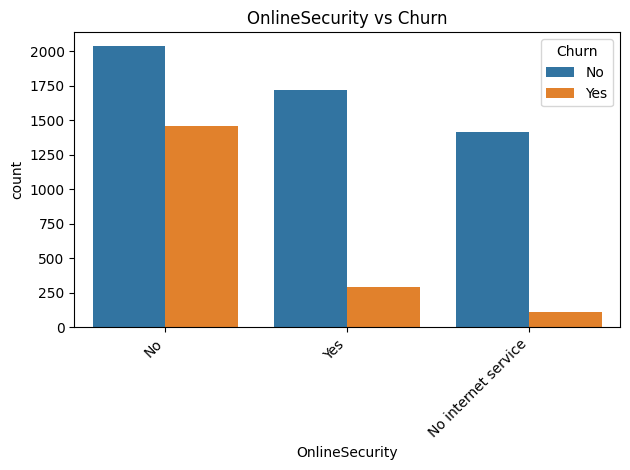

 47%|████▋     | 7/15 [00:03<00:04,  1.60it/s]

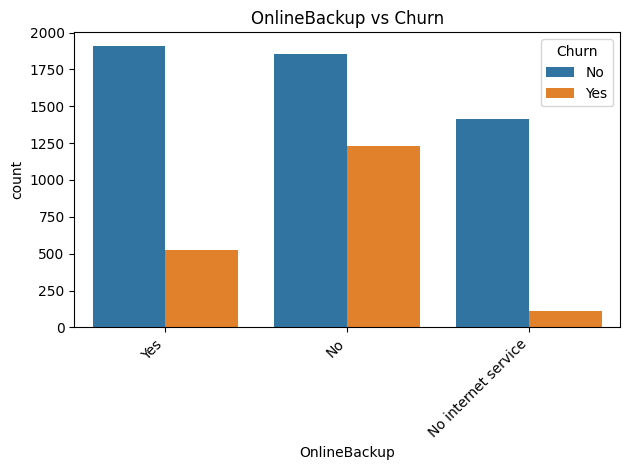

 53%|█████▎    | 8/15 [00:04<00:04,  1.40it/s]

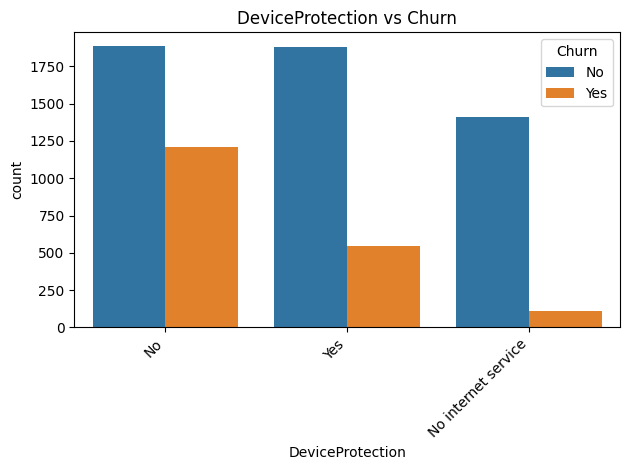

 60%|██████    | 9/15 [00:05<00:04,  1.28it/s]

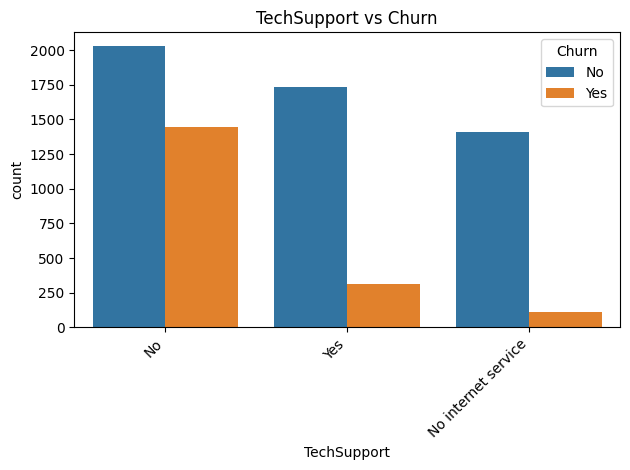

 67%|██████▋   | 10/15 [00:05<00:03,  1.37it/s]

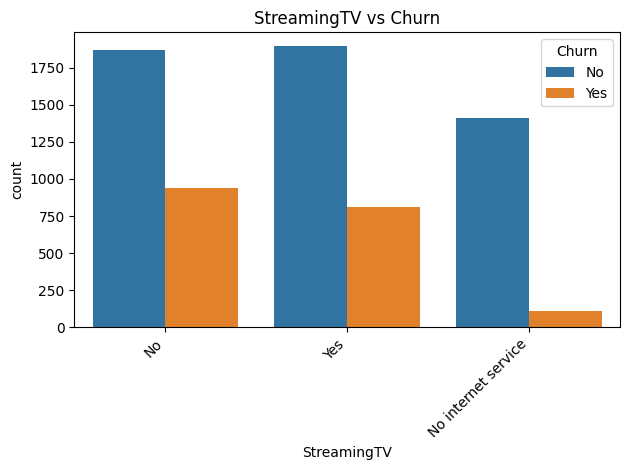

 73%|███████▎  | 11/15 [00:06<00:03,  1.30it/s]

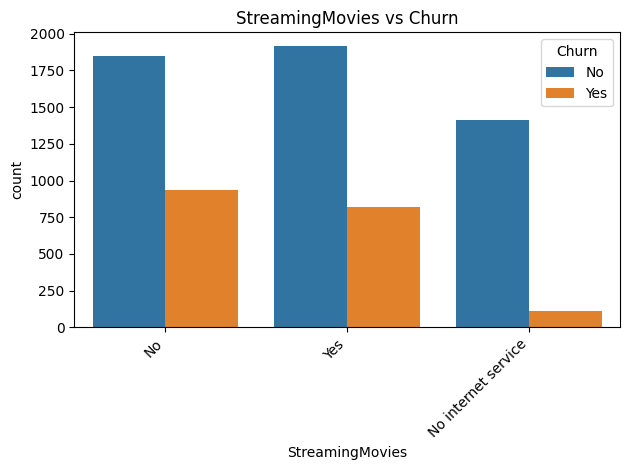

 80%|████████  | 12/15 [00:07<00:02,  1.49it/s]

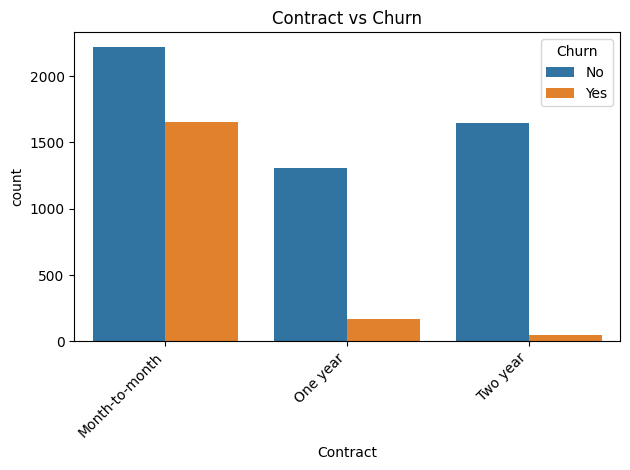

 87%|████████▋ | 13/15 [00:07<00:01,  1.64it/s]

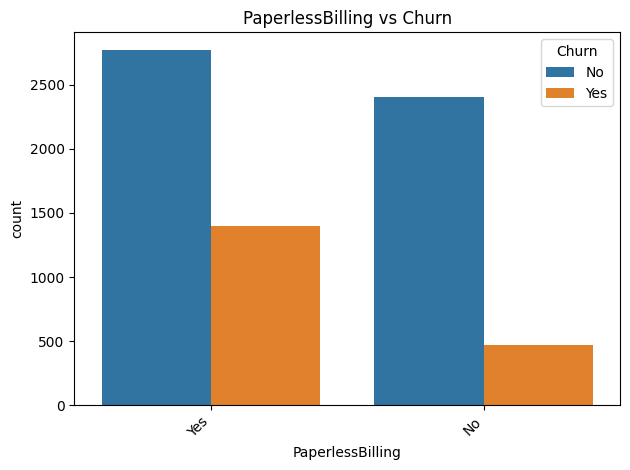

 93%|█████████▎| 14/15 [00:08<00:00,  1.84it/s]

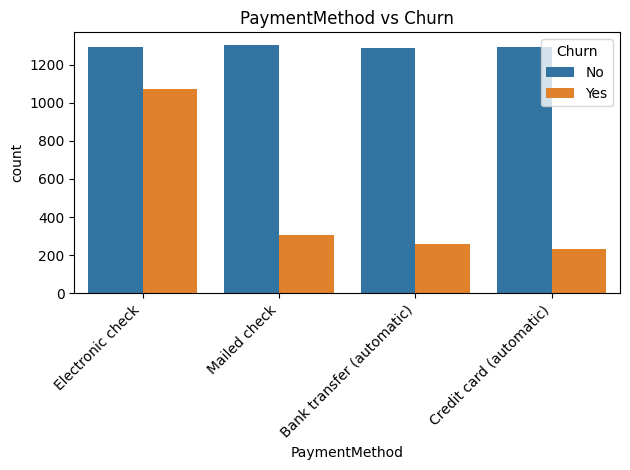

100%|██████████| 15/15 [00:08<00:00,  1.70it/s]


In [9]:
# Categorical frequency count plots

for col in tqdm.tqdm(cat_cols):
    sns.countplot(data=data, x=col, hue=churn_col)
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


## Numerical Features

- We then explored tenure, MonthlyCharges, and TotalCharges.  
- **Tenure:** Churners are mostly in the very early months (tenure close to 0). Customers with longer tenures rarely churn.  
- **MonthlyCharges:** Churn rates increase for customers with higher monthly bills.  
- **TotalCharges:** This is strongly related to tenure (since it accumulates over time). Churners tend to have lower total charges, again because many leave early.  

- Boxplots confirmed this – churners have much lower median tenure and total charges compared to non-churners, while their monthly charges tend to be on the higher side.  


In [10]:
# Normalized counts (row-wise) for categorical variables

for col in cat_cols:
    ct_norm = pd.crosstab(data[col], data[churn_col], normalize='index')
    print(f"Normalized counts for {col} (rows sum to 1):")
    print(ct_norm)
    print()


Normalized counts for gender (rows sum to 1):
Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603

Normalized counts for Partner (rows sum to 1):
Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649

Normalized counts for Dependents (rows sum to 1):
Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502

Normalized counts for PhoneService (rows sum to 1):
Churn               No       Yes
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096

Normalized counts for MultipleLines (rows sum to 1):
Churn                   No       Yes
MultipleLines                       
No                0.749558  0.250442
No phone service  0.750733  0.249267
Yes               0.713901  0.286099

Normalized counts for InternetService (rows sum to 1):
Churn                  No      

In [11]:
# Chi-square tests for categorical variables

for col in cat_cols:
    table = pd.crosstab(data[col], data[churn_col])
    # run chi-square if table is at least 2x2
    if table.shape[0] >= 2 and table.shape[1] >= 2:
        chi2, p, _, _ = chi2_contingency(table)
        significance = "Significant" if p < 0.05 else "Not Significant"
        print(f"{col}: p-value = {p:.4f} - {significance}")
    else:
        print(f"{col}: skipped chi-square (requires at least 2x2 table)")


gender: p-value = 0.4866 - Not Significant
Partner: p-value = 0.0000 - Significant
Dependents: p-value = 0.0000 - Significant
PhoneService: p-value = 0.3388 - Not Significant
MultipleLines: p-value = 0.0035 - Significant
InternetService: p-value = 0.0000 - Significant
OnlineSecurity: p-value = 0.0000 - Significant
OnlineBackup: p-value = 0.0000 - Significant
DeviceProtection: p-value = 0.0000 - Significant
TechSupport: p-value = 0.0000 - Significant
StreamingTV: p-value = 0.0000 - Significant
StreamingMovies: p-value = 0.0000 - Significant
Contract: p-value = 0.0000 - Significant
PaperlessBilling: p-value = 0.0000 - Significant
PaymentMethod: p-value = 0.0000 - Significant


  0%|          | 0/3 [00:00<?, ?it/s]

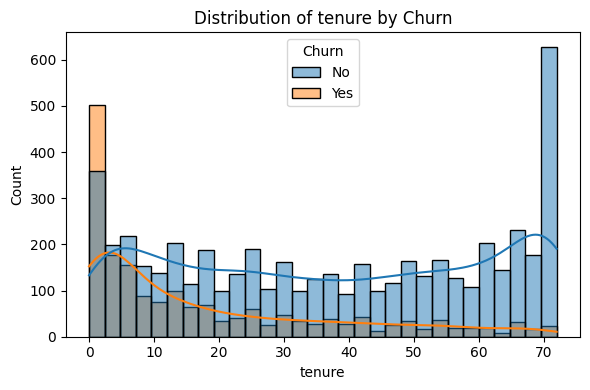

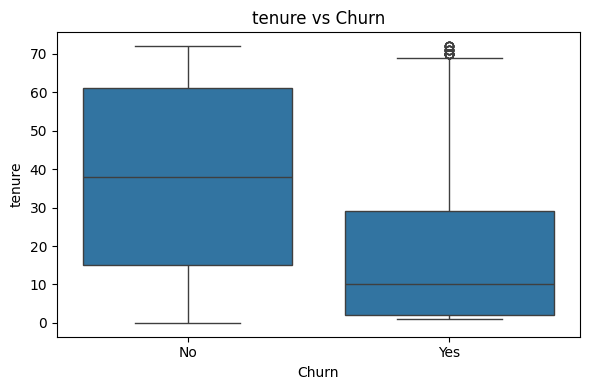

 33%|███▎      | 1/3 [00:01<00:02,  1.13s/it]

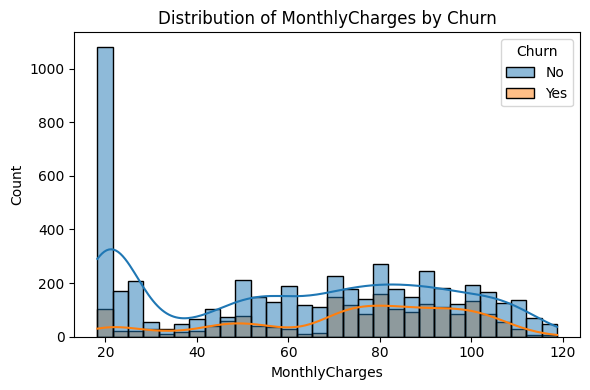

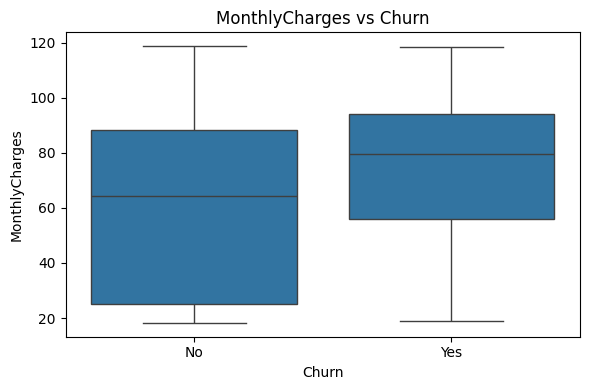

 67%|██████▋   | 2/3 [00:02<00:01,  1.20s/it]

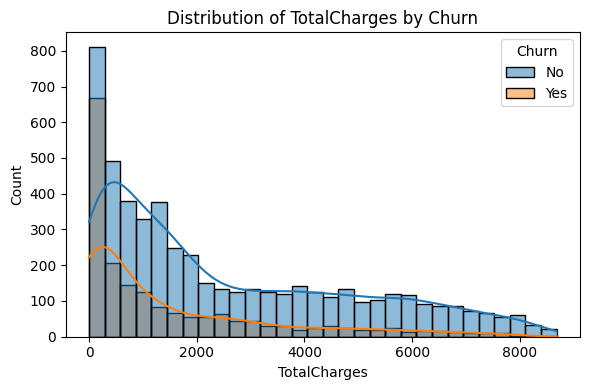

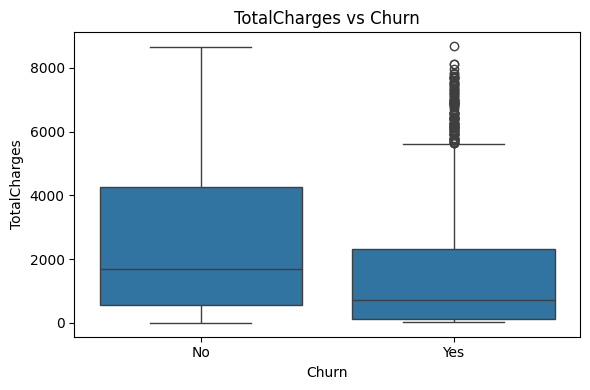

100%|██████████| 3/3 [00:03<00:00,  1.12s/it]


In [12]:
# Numeric distributions by churn + boxplots

for col in tqdm.tqdm(num_cols):
    plt.figure(figsize=(6,4))
    sns.histplot(data, x=col, hue=churn_col, kde=True, bins=30)
    plt.title(f"Distribution of {col} by Churn")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(data=data, x=churn_col, y=col)
    plt.title(f"{col} vs Churn")
    plt.tight_layout()
    plt.show()


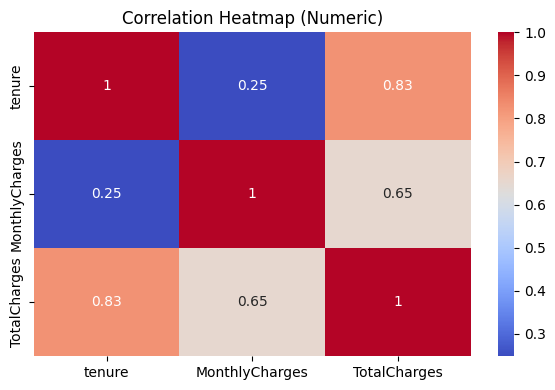

In [13]:
# Correlation heatmap for numeric variables
plt.figure(figsize=(6,4))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric)")
plt.tight_layout()
plt.show()

if "ChurnFlag" in data.columns:
    corr_df = data[num_cols + ["ChurnFlag"]].corr()
    plt.figure(figsize=(6,4))
    sns.heatmap(corr_df, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Correlation Heatmap (Numeric + ChurnFlag)")
    plt.tight_layout()
    plt.show()


### Correlations Between Numeric Features

- The heatmap showed:  
  - **Tenure and TotalCharges** are highly correlated (0.83).  
  - **MonthlyCharges and TotalCharges** are also correlated (0.65).  
  - **Tenure and MonthlyCharges** are not strongly correlated (~0.25).  
- This suggests that TotalCharges doesn’t add much new information beyond tenure and monthly charges, so we might consider dropping it or being careful about multicollinearity when fitting linear/logistic models.  


Our analysis shows churn is imbalanced, with only about 27% of customers leaving. Key drivers include contract type, payment method, and internet services with add-ons like tech support. Gender has little impact, but having a partner or dependents matters. Churners are often newer customers with low tenure and total charges but higher monthly bills. We also found correlations among numeric features, which we’ll need to account for in modeling.


In [14]:
binary_cols = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

for col in binary_cols:
    data[col] = data[col].map({'Yes':1,'No':0})

print(data[binary_cols].head())
data.shape


   Partner  Dependents  PhoneService  PaperlessBilling  Churn
0        1           0             0                 1      0
1        0           0             1                 0      0
2        0           0             1                 1      1
3        0           0             0                 0      0
4        0           0             1                 1      1


(7043, 20)

In [15]:
# one hot encoding
cat_cols = data.select_dtypes(include=['object']).columns

data = pd.get_dummies(data, columns=cat_cols, drop_first=True)
bool_cols = data.select_dtypes(include=['bool']).columns
data[bool_cols] = data[bool_cols].astype(int)
data.shape

(7043, 31)

Before moving into assumption checks, we cleaned up the dataset so it could be used with regression models. Binary categorical variables like **PhoneService** and **Partner** were mapped from “Yes/No” to 1 and 0, making them proper numeric indicators. For variables with more than two categories, such as **PaymentMethod** and **Contract**, we used one-hot encoding to create dummy variables, then converted them from True/False to 0/1 so they’re ready for modeling.


## Assumptions about linear, logistic, and GAM models

### 1. Assumptions for Linear Regression Check

In [16]:
X = data.drop(columns=['Churn'])
y = data['Churn']

# fit OLS model
X_const = sm.add_constant(X)
lin_model = sm.OLS(y, X_const).fit()

# regression summary
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     121.1
Date:                Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:40:38   Log-Likelihood:                -3058.7
No. Observations:                7043   AIC:                             6165.
Df Residuals:                    7019   BIC:                             6330.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.2738      0.103      2.664      0.008       0.072       0.475
SeniorCitizen                             0.0442      0.013      3.403      0.001       0.019       0.070
Partner                                  -0.0012      0.011     -0.113      0.910      -0.022       0.020
Dependents                               -0.0209      0.011     -1.826      0.068      -0.043       0.002
tenure                                   -0.0019      0.000     -3.799      0.000      -0.003      -0.001
PhoneService                              0.1347      0.095      1.417      0.156      -0.052       0.321
PaperlessBilling                          0.0449      0.010      4.502      0.000       0.025       0.064
MonthlyCharges                           -0.0013      0.004     -0.309      0.757      -0.010       0.007
TotalCharges                           -4.44e-05   6.46e-06     -6.870      0.000   -5.71e-05   -3.17e-05
gender_Male                              -0.0033      0.009     -0.369      0.712      -0.021       0.014
MultipleLines_No phone service            0.1391      0.014      9.655      0.000       0.111       0.167
MultipleLines_Yes                         0.0581      0.024      2.387      0.017       0.010       0.106
InternetService_Fiber optic               0.2110      0.109      1.929      0.054      -0.003       0.425
InternetService_No                       -0.0257      0.016     -1.631      0.103      -0.057       0.005
OnlineSecurity_No internet service       -0.0257      0.016     -1.631      0.103      -0.057       0.005
OnlineSecurity_Yes                       -0.0427      0.025     -1.720      0.085      -0.091       0.006
OnlineBackup_No internet service         -0.0257      0.016     -1.631      0.103      -0.057       0.005
OnlineBackup_Yes                         -0.0118      0.024     -0.483      0.629      -0.060       0.036
DeviceProtection_No internet service     -0.0257      0.016     -1.631      0.103      -0.057       0.005
DeviceProtection_Yes                      0.0043      0.025      0.174      0.862      -0.044       0.053
TechSupport_No internet service          -0.0257      0.016     -1.631      0.103      -0.057       0.005
TechSupport_Yes                          -0.0438      0.025     -1.754      0.079      -0.093       0.005
StreamingTV_No internet service          -0.0257      0.016     -1.631      0.103      -0.057       0.005
StreamingTV_Yes                           0.0635      0.045      1.412      0.158      -0.025       0.152
StreamingMovies_No internet service      -0.0257      0.016     -1.631      0.103      -0.057       0.005
StreamingMovies_Yes                       0.0664      0.045      1.478      0.139      -0.022       0.155
Contract_


Running OLS on churn as a continuous outcome shows that the model has limited explanatory power. The **R² is about 0.28**, meaning less than one-third of the variation in churn is explained by the predictors. This confirms that linear regression is not a great fit for this problem, which makes sense given churn is binary.

Looking at individual predictors, some variables such as **tenure, contract type, paperless billing, multiple lines, and electronic check payments** come out as statistically significant, while many others (e.g., gender, partner, dependents, and streaming services) do not. This echoes the trends seen in the EDA, where customer tenure and type of service contracts appeared more strongly linked to churn than demographic variables.

Overall, the regression highlights a few meaningful relationships but also reinforces that linear regression is not well suited here: predictions can be unrealistic (outside 0–1), many assumptions are violated, and the fit is weak. These results point us toward using **logistic regression**, which is designed for binary classification and will allow for more interpretable probability estimates.


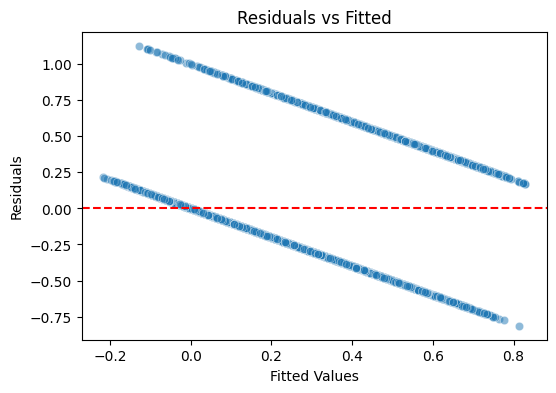

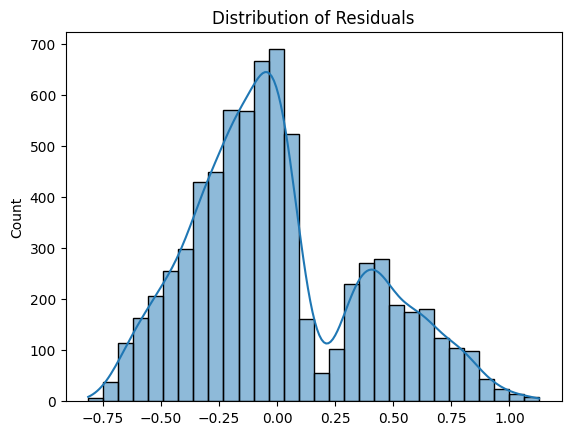

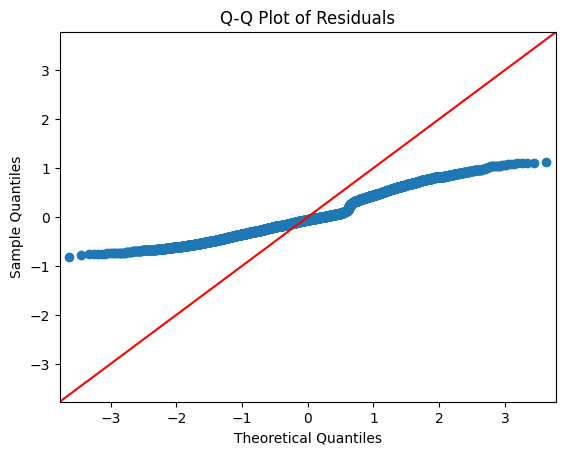

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,const,0.000000
1,SeniorCitizen,1.153365
2,Partner,1.462701
3,Dependents,1.384430
4,tenure,7.527280
5,PhoneService,inf
6,PaperlessBilling,1.209020
7,MonthlyCharges,865.062147
8,TotalCharges,10.793729
9,gender_Male,1.002137


In [17]:
# Residual vs Fitted values to check on assumptions of linearity & homoscedasticity
fitted = lin_model.fittedvalues
resid = lin_model.resid

plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=resid, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# histogram
sns.histplot(resid, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.show()

# produce qq plot
sm.qqplot(resid, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

# multicollinearity
vif = pd.DataFrame()
vif['feature'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif

Looking at the diagnostic plots and VIF values, it’s clear that our linear regression model struggles to meet several of the standard assumptions:

- **Residuals vs Fitted**: The scatterplot shows a distinct pattern instead of random scatter, with clear bands of residuals rather than a diffuse cloud. This indicates that the relationship between predictors and churn is not well captured by a linear model and suggests issues with heteroscedasticity.

- **Distribution of Residuals**: The histogram highlights that residuals are not normally distributed. The shape is bimodal rather than the expected symmetric, bell-shaped curve, reinforcing that normality is violated.

- **Q–Q Plot**: The residuals deviate substantially from the 45-degree reference line, especially in the tails. This again signals that the residuals are far from normal.

- **Multicollinearity (VIF)**: The VIF analysis points to severe collinearity. Several dummy variables return infinite VIF values, while features like `MonthlyCharges` (VIF ≈ 865) and `InternetService_Fiber optic` (VIF ≈ 148) are extremely high. This level of multicollinearity makes individual coefficients unreliable.

### Conclusion
Overall, these checks confirm that the linear regression model violates key assumptions — linearity, homoscedasticity, normality, and multicollinearity. This further underlines why linear regression is not suitable for churn prediction, and why we need to move toward logistic regression or other classification models.


### Logistic Regression Assumptions Check



In [18]:
X_log = data.drop(columns=['Churn'])
y_log = data['Churn']
data.shape

assert set(data['Churn'].unique()).issubset({0,1}), "Churn is not binary!"
X_log_const = sm.add_constant(X_log)
log_model = sm.Logit(y_log, X_log_const).fit()

log_model.summary()



Optimization terminated successfully.
         Current function value: 0.413764
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7019
Method:                           MLE   Df Model:                           23
Date:                Mon, 15 Sep 2025   Pseudo R-squ.:                  0.2849
Time:                        11:40:41   Log-Likelihood:                -2914.1
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.8373        nan        nan        nan         nan         nan
SeniorCitizen                             0.2156      0.081      2.653      0.008       0.056       0.375
Partner                                  -0.0019      0.077     -0.025      0.980      -0.153       0.150
Dependents                               -0.1518      0.090     -1.693      0.091      -0.328       0.024
tenure                                   -0.0603      0.006     -9.637      0.000      -0.073      -0.048
PhoneService                              0.5076        nan        nan        nan         nan         nan
PaperlessBilling                          0.3421      0.075      4.588      0.000       0.196       0.488
MonthlyCharges                           -0.0405      0.017     -2.401      0.016      -0.074      -0.007
TotalCharges                              0.0003   7.07e-05      4.642      0.000       0.000       0.000
gender_Male                              -0.0219      0.065     -0.338      0.735      -0.149       0.105
MultipleLines_No phone service            0.3297   2.75e+06    1.2e-07      1.000    -5.4e+06     5.4e+06
MultipleLines_Yes                         0.4472      0.113      3.974      0.000       0.227       0.668
InternetService_Fiber optic               1.7524      0.405      4.322      0.000       0.958       2.547
InternetService_No                       -0.2562        nan        nan        nan         nan         nan
OnlineSecurity_No internet service       -0.2562        nan        nan        nan         nan         nan
OnlineSecurity_Yes                       -0.2055      0.115     -1.794      0.073      -0.430       0.019
OnlineBackup_No internet service         -0.2562        nan        nan        nan         nan         nan
OnlineBackup_Yes                          0.0255      0.109      0.234      0.815      -0.188       0.239
DeviceProtection_No internet service     -0.2562        nan        nan        nan         nan         nan
DeviceProtection_Yes                      0.1474      0.113      1.303      0.193      -0.074       0.369
TechSupport_No internet service          -0.2562   5.14e+14  -4.99e-16      1.000   -1.01e+15    1.01e+15
TechSupport_Yes                          -0.1795      0.094     -1.902      0.057      -0.365       0.005
StreamingTV_No internet service          -0.2562   5.14e+14  -4.99e-16      1.000   -1.01e+15    1.01e+15
StreamingTV_Yes                           0.5911      0.179      3.302      0.001       0.240       0.942
StreamingMovies_No internet service      -0.2562        nan        nan        nan         nan         nan
StreamingMovies_Yes                       0.6025      0.158      3.807      0.000       0.292       0.913
Contract_One year                        -0.6652      0.108     -6.187      0.000      -0.876      -0.454
Contract_Two year                        -1.3803      0.175  

In [19]:
# get VIF
vif = pd.DataFrame()
vif['feature'] = X_log_const.columns
vif['VIF'] = [variance_inflation_factor(X_log_const.values, i) for i in range(X_log_const.shape[1])]
vif

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,const,0.000000
1,SeniorCitizen,1.153365
2,Partner,1.462701
3,Dependents,1.384430
4,tenure,7.527280
5,PhoneService,inf
6,PaperlessBilling,1.209020
7,MonthlyCharges,865.062147
8,TotalCharges,10.793729
9,gender_Male,1.002137


The logistic regression model was fit successfully on 7,043 observations, which is a sufficiently large sample size. The target variable (churn) is encoded as binary (0/1), satisfying the fundamental requirement for logistic regression.

Looking at the predictors, the continuous variables **tenure**, **MonthlyCharges**, and **TotalCharges** are statistically significant (p < 0.05 in most cases). This supports the assumption that the log-odds of churn have a linear relationship with these continuous features. For binary and categorical predictors, this linearity assumption does not apply.

However, the **VIF analysis** highlights severe multicollinearity. Some predictors such as `MonthlyCharges` (VIF ≈ 865) and `InternetService_Fiber optic` (VIF ≈ 148) show extremely high values, and many dummy variables have infinite VIF due to redundancy. This means while the overall model can predict churn, interpretation of individual coefficients is unreliable because of overlapping information among predictors.

**In summary**, logistic regression assumptions are mostly satisfied regarding the binary outcome and linearity of continuous predictors, but multicollinearity remains a major issue that needs to be addressed for stable inference.


### Assumptions for GAM Check


In [20]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.drop('Churn')

# GAM terms
terms = None

for i in range(len(numeric_cols)):
    if terms is None:
        terms = s(i)
    else:
        terms += s(i)

X_gam = data[numeric_cols]
y_gam = data['Churn']

# fit
gam = LogisticGAM(terms).fit(X_gam.values, y_gam.values)
gam.summary()


LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     57.6148
Link Function:                        LogitLink Log Likelihood:                                 -2828.1922
Number of Samples:                         7043 AIC:                                             5771.6139
                                                AICc:                                            5772.6147
                                                UBRE:                                                2.826
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.306
Feature Function                  Lam

/tmp/ipython-input-1833379519.py:17: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


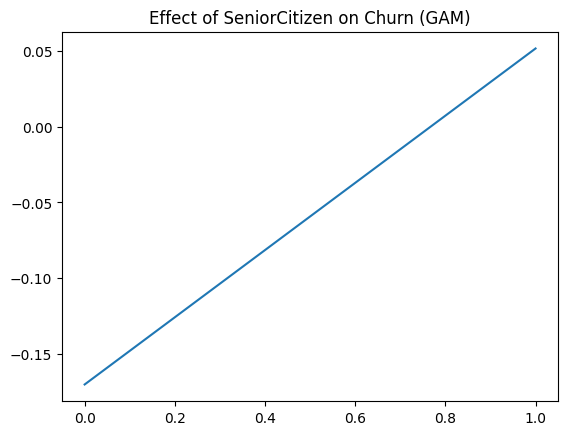

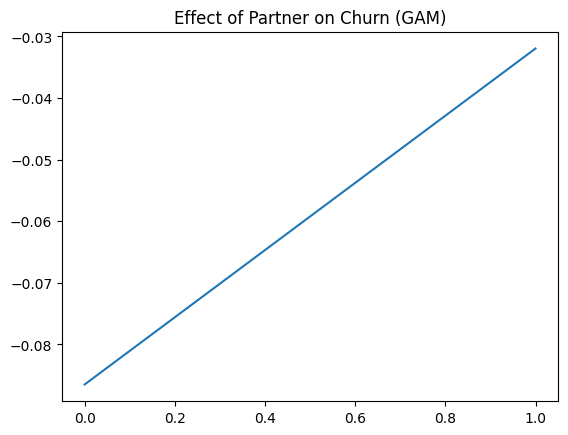

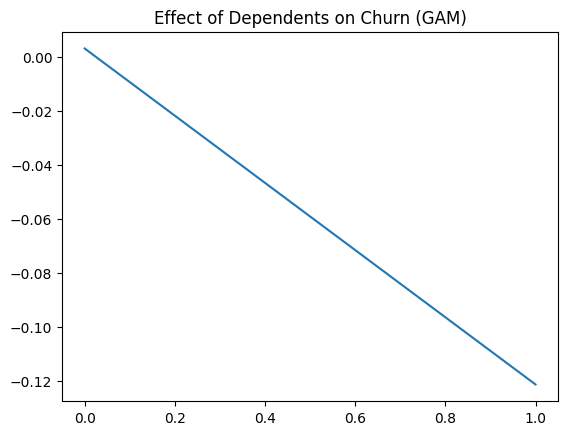

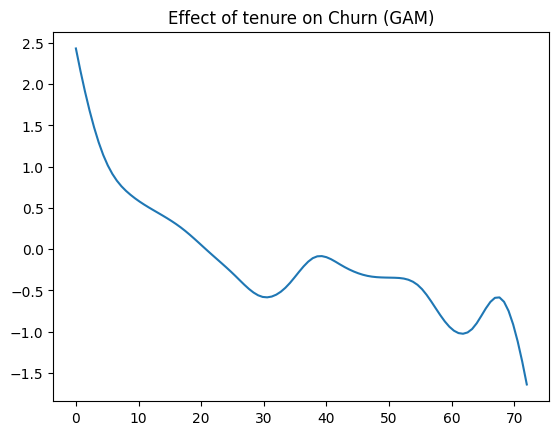

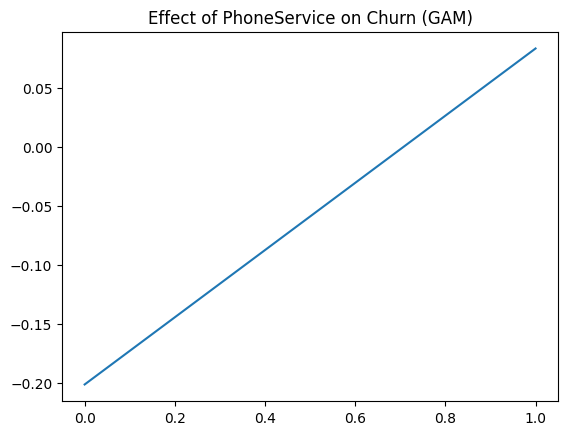

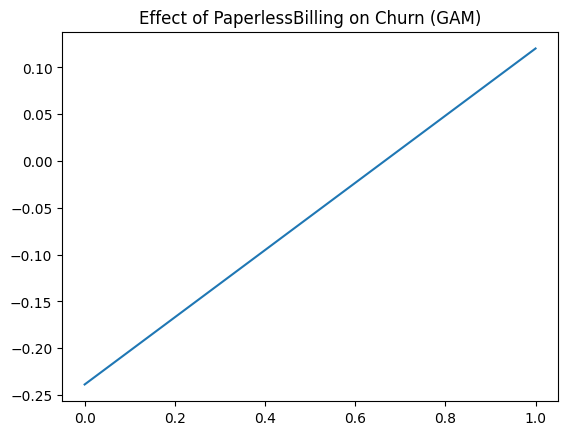

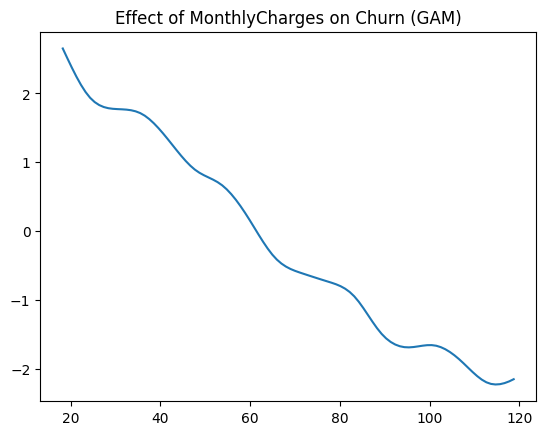

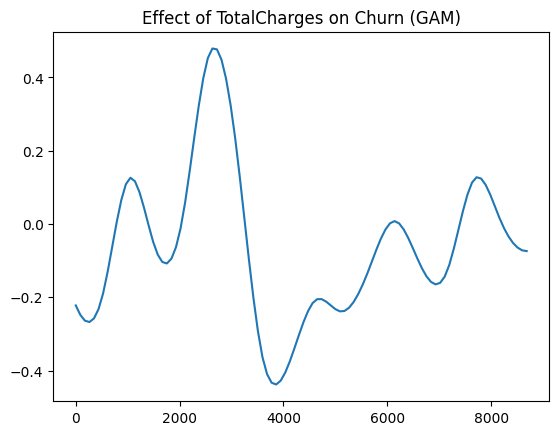

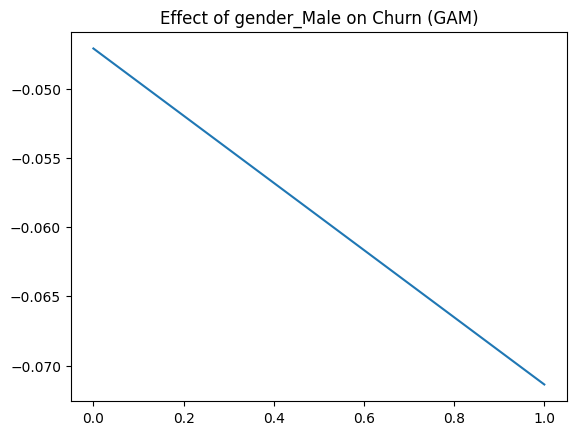

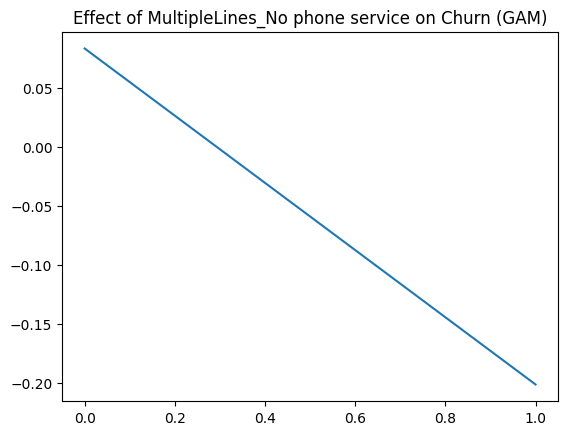

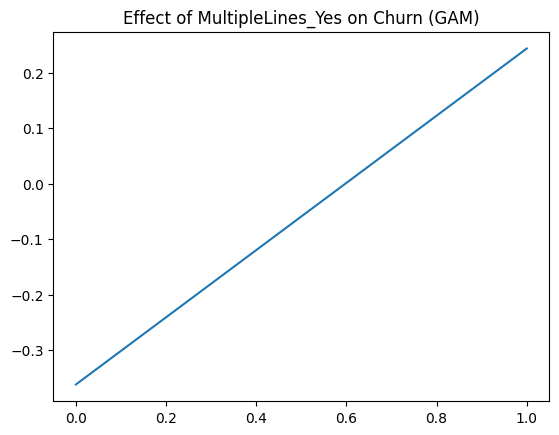

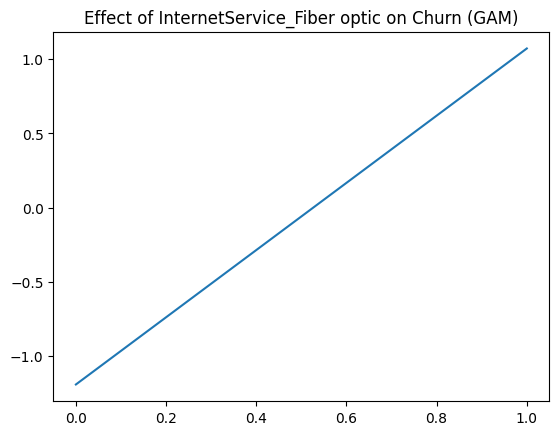

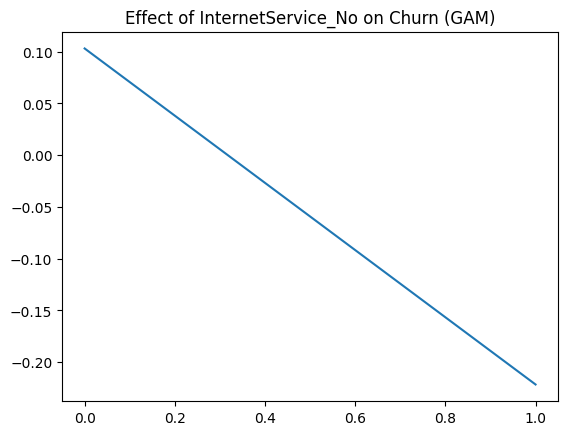

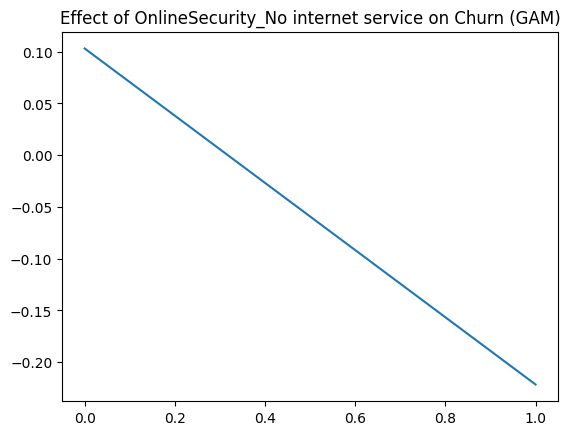

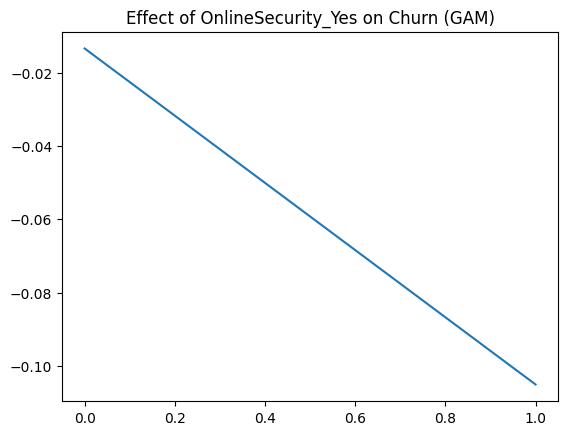

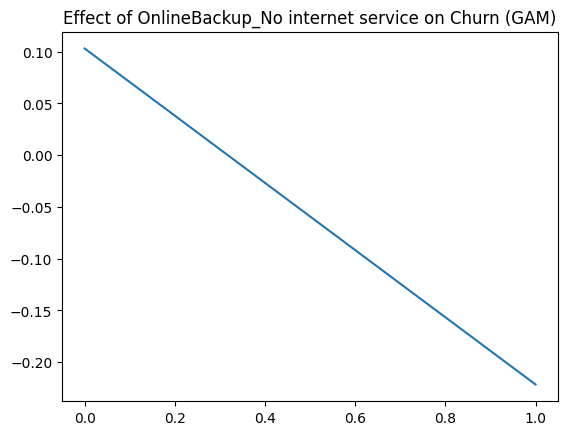

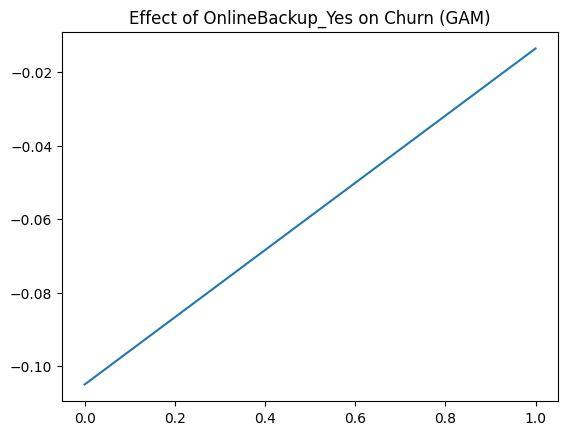

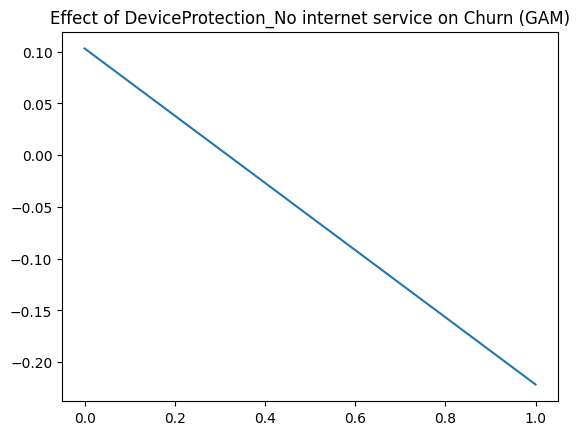

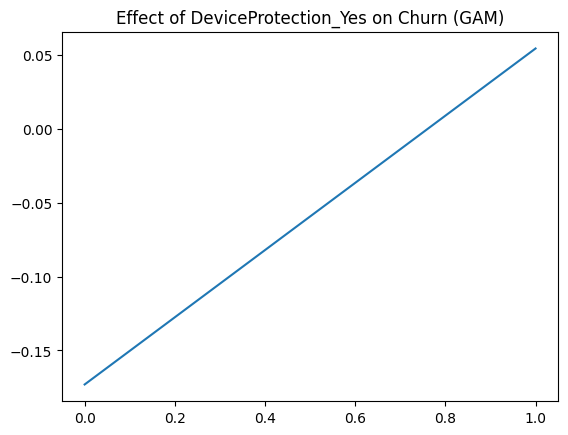

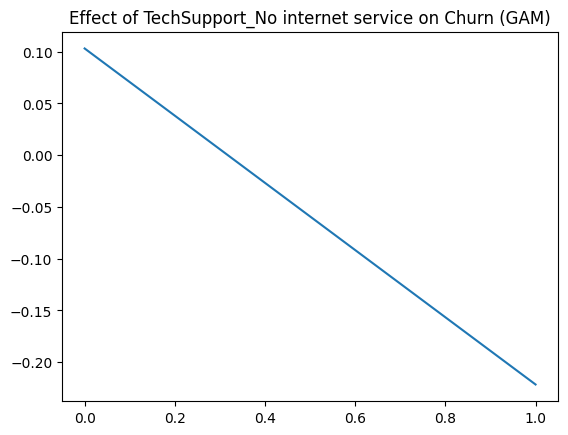

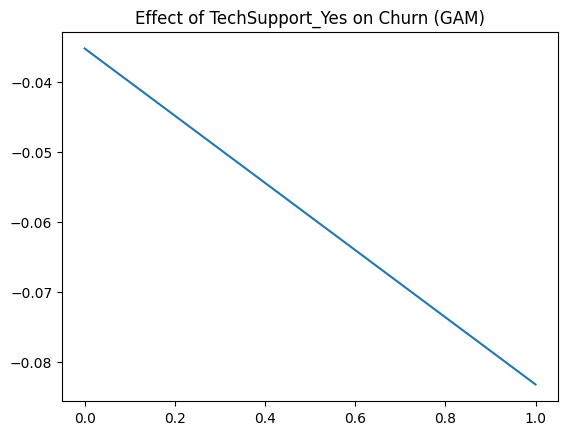

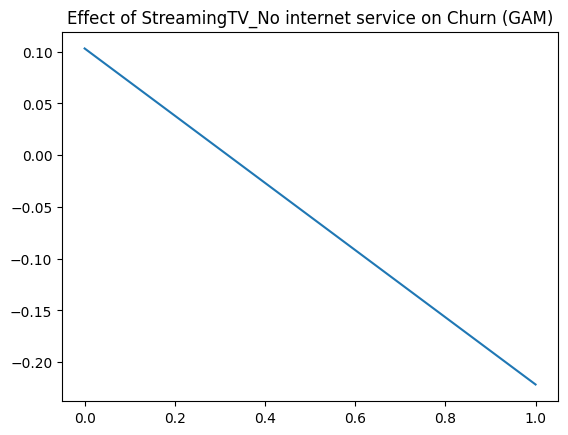

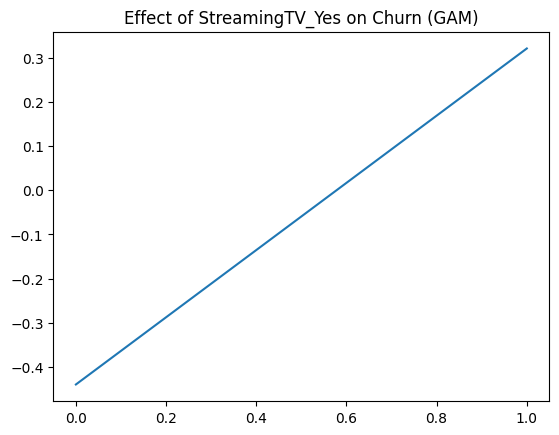

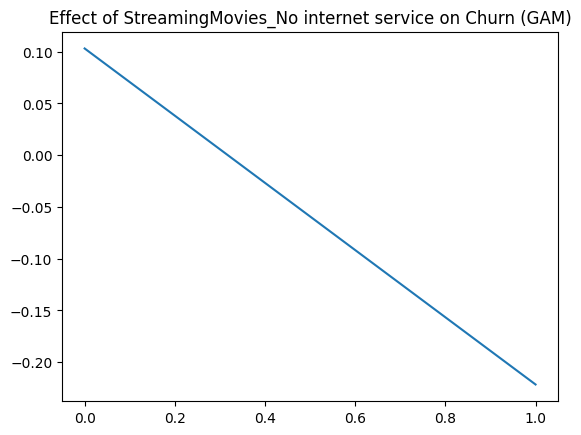

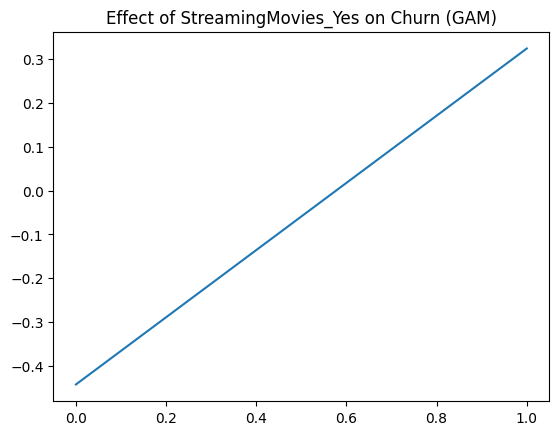

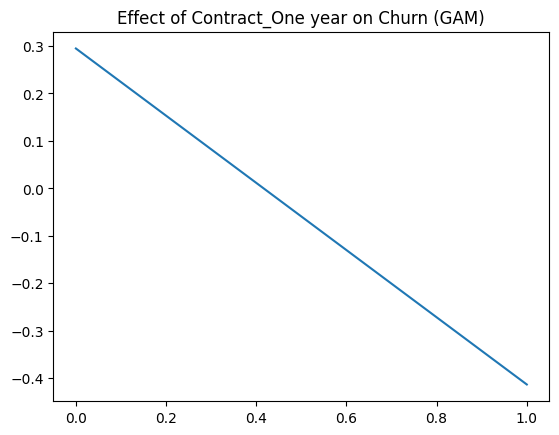

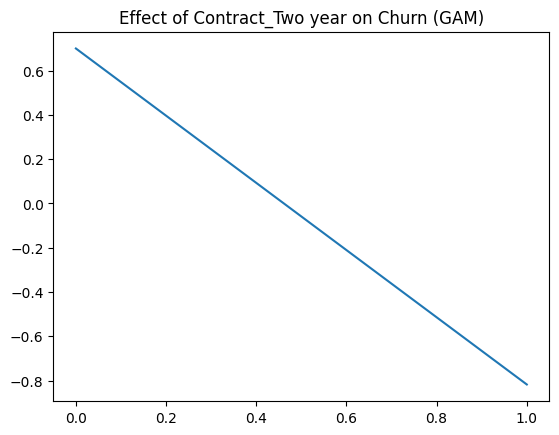

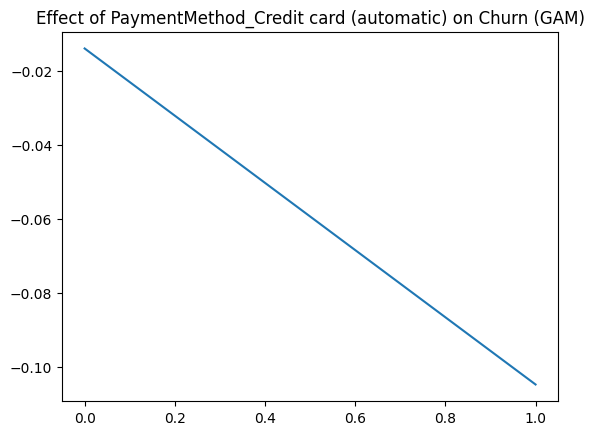

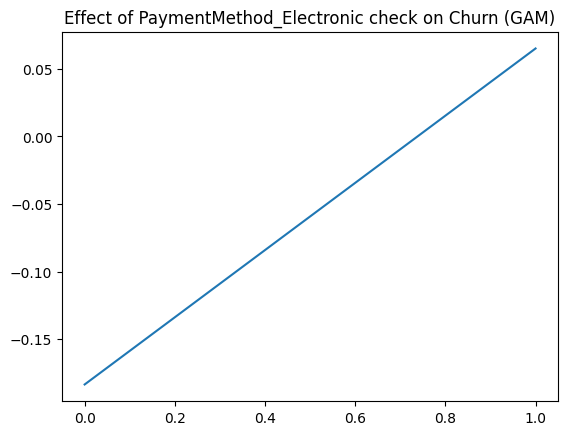

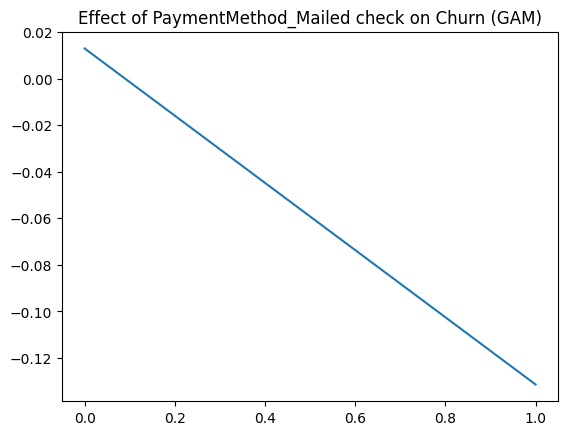

In [21]:
gam.terms

for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    XX = gam.generate_X_grid(term=i)
    plt.figure()
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.title(f"Effect of {X_gam.columns[i]} on Churn (GAM)")
    plt.show()

From this analysis, we can conclude that the assumptions for the GAM are generally satisfied. Churn is already a binary target, and the model is able to capture important non-linear effects, particularly for variables like tenure, monthly charges, and total charges.

###2: Linear Regression: Treat the churn variable as a continuous variable (e.g., 0 for staying, 1 for churning) and build a linear regression model to predict churn. Interpret the coefficients and assess the model's performance.

In [22]:
# drop high multicollinearity columns
drop_cols = [
    'PhoneService', 'MultipleLines_No phone service', 'InternetService_No',
    'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
    'DeviceProtection_No internet service', 'TechSupport_No internet service',
    'StreamingTV_No internet service', 'StreamingMovies_No internet service'
]

X = data.drop(columns=drop_cols + ['Churn'])
y = data['Churn']

# split data into train (70%), validation (15%), test(15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(X_train.shape, X_test.shape, X_val.shape)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
X_val_const = sm.add_constant(X_val)

ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())

(4930, 21) (1056, 21) (1057, 21)
                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     91.23
Date:                Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:41:08   Log-Likelihood:                -2152.3
No. Observations:                4930   AIC:                             4349.
Df Residuals:                    4908   BIC:                             4492.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [23]:
# predict
y_train_pred = ols_model.predict(X_train_const)
y_test_pred = ols_model.predict(X_test_const)
y_val_pred = ols_model.predict(X_val_const)

y_train_pred_bin = (y_train_pred >= 0.5).astype(int)
y_test_pred_bin = (y_test_pred >= 0.5).astype(int)
y_val_pred_bin = (y_val_pred >= 0.5).astype(int)

# model perfromance metrics
print("=== Train Metrics ===")
print("R2:", r2_score(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Accuracy:", accuracy_score(y_train, y_train_pred_bin))
print("F1:", f1_score(y_train, y_train_pred_bin))
print("ROC-AUC:", roc_auc_score(y_train, y_train_pred))


print("\n=== Test Metrics ===")
print("R2:", r2_score(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Accuracy:", accuracy_score(y_test, y_test_pred_bin))
print("F1:", f1_score(y_test, y_test_pred_bin))
print("ROC-AUC:", roc_auc_score(y_test, y_test_pred))


print("\n=== Validation Metrics ===")
print("R2:", r2_score(y_val, y_val_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_val_pred)))
print("Accuracy:", accuracy_score(y_val, y_val_pred_bin)
)
print("F1:", f1_score(y_val, y_val_pred_bin))
print("ROC-AUC:", roc_auc_score(y_val, y_val_pred))


=== Train Metrics ===
R2: 0.28076669518152686
RMSE: 0.37442606221589364
Accuracy: 0.7989858012170385
F1: 0.5719222462203024
ROC-AUC: 0.836770428590486

=== Test Metrics ===
R2: 0.264812953129819
RMSE: 0.37848169626239864
Accuracy: 0.7992424242424242
F1: 0.5875486381322957
ROC-AUC: 0.8322233983799705

=== Validation Metrics ===
R2: 0.27257198253237525
RMSE: 0.3767940579942735
Accuracy: 0.7880794701986755
F1: 0.5352697095435685
ROC-AUC: 0.8340793190739992


Treating churn as a continuous outcome, we fit a linear regression model and examined both the coefficients and performance metrics. The intercept of ~0.15 suggests a baseline churn probability of about 15% when all other factors are set to zero.

Positive coefficients indicate higher churn risk for example, customers on electronic check payment, fiber optic internet, or paperless billing are more likely to churn. On the other hand, longer tenure, higher accumulated total charges, and being on a one-year or two-year contract reduce churn, showing strong retention effects.

Contract type stands out as one of the most influential factors for reducing churn. Several predictors, such as gender or device protection, were statistically insignificant, adding little explanatory power once other features were included.

From a performance standpoint, the model explains roughly 26–28% of churn variability across training, validation, and test sets (R² values). RMSE values hover around 0.37, meaning predictions deviate by about 37 percentage points on average.

Accuracy is around 79% across splits, though this number is inflated by class imbalance. F1 scores (0.53–0.59) and ROC-AUC values (~0.83) provide a more balanced view, indicating that while the model captures general churn patterns, it struggles to perfectly separate churners from non-churners.

Overall, the linear regression offers some useful directional insights but remains limited as a predictive model for churn.


### 3: Logistic Regression: Treat churn as a binary variable and build a logistic regression model to predict the probability of churn. Interpret the coefficients.

From our above analysis to check on assumptions we are aware that some features had a VIF of inifinity which could be problematic. For this we will manually drop those columns

In [24]:
# drop high multicollinearity columns
cols_to_drop = [
    'PhoneService','MultipleLines_No phone service','InternetService_No',
    'OnlineSecurity_No internet service','OnlineBackup_No internet service',
    'DeviceProtection_No internet service', 'TechSupport_No internet service',
    'StreamingTV_No internet service','StreamingMovies_No internet service',
]

X = data.drop(columns=cols_to_drop + ['Churn'])
y = data['Churn']
# split data into train (70%), validation (15%), test(15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

X_train_const = sm.add_constant(X_train)
X_val_const = sm.add_constant(X_val)
X_test_const = sm.add_constant(X_test)

# fit
logit_model = sm.Logit(y_train, X_train_const)
logit_result = logit_model.fit()
print(logit_result.summary())


Train size: (4930, 21)
Validation size: (1056, 21)
Test size: (1057, 21)
Optimization terminated successfully.
         Current function value: 0.418243
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4908
Method:                           MLE   Df Model:                           21
Date:                Mon, 15 Sep 2025   Pseudo R-squ.:                  0.2771
Time:                        11:41:08   Log-Likelihood:                -2061.9
converged:                       True   LL-Null:                       -2852.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [25]:
# predict
y_train_prob = logit_result.predict(X_train_const)
y_val_prob = logit_result.predict(X_val_const)
y_test_prob = logit_result.predict(X_test_const)

y_train_pred = (y_train_prob >= 0.5).astype(int)
y_val_pred = (y_val_prob >= 0.5).astype(int)
y_test_pred = (y_test_prob >= 0.5).astype(int)

# model performance metrics
print("=== Train Metrics ===")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))
print("ROC-AUC:", roc_auc_score(y_train, y_train_prob))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

print("\n=== Validation Metrics ===")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_val_prob))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

print("\n=== Test Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_test_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

=== Train Metrics ===
Accuracy: 0.8016227180527383
F1 Score: 0.5827645051194539
ROC-AUC: 0.8439551154430028
Confusion Matrix:
 [[3269  353]
 [ 625  683]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3622
           1       0.66      0.52      0.58      1308

    accuracy                           0.80      4930
   macro avg       0.75      0.71      0.73      4930
weighted avg       0.79      0.80      0.79      4930


=== Validation Metrics ===
Accuracy: 0.7935606060606061
F1 Score: 0.5855513307984791
ROC-AUC: 0.837239966863034
Confusion Matrix:
 [[684  92]
 [126 154]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       776
           1       0.63      0.55      0.59       280

    accuracy                           0.79      1056
   macro avg       0.74      0.72      0.72      1056
weighted avg       0.79      0.79      0.79      1056


=== Test Metrics ===
Accuracy: 0.796

In the logistic regression, positive coefficients signal higher churn risk, while negative ones suggest retention effects. For example, *PaperlessBilling* (0.47) and *PaymentMethod_Electronic check* (0.42) raise the log-odds of churn. Converting to odds ratios, exp(0.47) ≈ 1.6, meaning customers on paperless billing are about 1.6× more likely to churn, holding other factors constant.  

On the other hand, services like *OnlineSecurity_Yes* (-0.41) and *TechSupport_Yes* (-0.37) lower the odds of churn, showing their importance as retention drivers. Contract type plays a strong role too: both one-year and two-year contracts significantly reduce churn compared to month-to-month agreements.

Tenure also has a negative coefficient, confirming that longer-standing customers are less likely to leave, though the effect per month is modest.  

Not every feature is meaningful—variables such as *DeviceProtection_Yes* and *StreamingTV_Yes* had p-values above 0.05, suggesting weak predictive value once other factors are controlled for.

**Model Performance**

Across train, validation, and test sets, accuracy consistently hovered around 79–80%, which reflects decent overall performance. But because churn is imbalanced, accuracy alone overstates effectiveness. Looking at F1 scores (~0.56–0.59) gives a clearer picture: the model captures churners better than random guessing but still misses a sizeable portion. Precision sits in the mid-60s, meaning when the model predicts churn it’s usually correct, but recall is lower (roughly 0.49–0.55), showing that nearly half of actual churners go undetected.  

Overall, the logistic regression improves interpretability and highlights meaningful retention levers like contract type, billing method, and service add-ons, but the class imbalance limits its ability to catch all churners.


###4: Generalized Additive Model (GAM): Build a GAM to model the non-linear relationships between customer features and churn. Interpret the GAM model.


In [26]:
cols_to_drop = [
    'PhoneService','MultipleLines_No phone service','InternetService_No',
    'OnlineSecurity_No internet service','OnlineBackup_No internet service',
    'DeviceProtection_No internet service', 'TechSupport_No internet service',
    'StreamingTV_No internet service','StreamingMovies_No internet service',
]

X = data.drop(columns=cols_to_drop + ['Churn'])
y = data['Churn']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# number of features
num_features = X_train.shape[1]

num_features

X_train.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'gender_Male', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [27]:
gam = LogisticGAM(
    s(0) +                 # SeniorCitizen
    f(1) +                 # Partner
    f(2) +                 # Dependents
    s(3) +                 # tenure
    f(4) +                 # PaperlessBilling
    s(5) +                 # MonthlyCharges
    s(6) +                 # TotalCharges
    f(7) +                 # gender_Male
    f(8) +                 # MultipleLines_Yes
    f(9) +                 # InternetService_Fiber optic
    f(10) +                # OnlineSecurity_Yes
    f(11) +                # OnlineBackup_Yes
    f(12) +                # DeviceProtection_Yes
    f(13) +                # TechSupport_Yes
    f(14) +                # StreamingTV_Yes
    f(15) +                # StreamingMovies_Yes
    f(16) +                # Contract_One year
    f(17) +                # Contract_Two year
    f(18) +                # PaymentMethod_Credit card (automatic)
    f(19) +                # PaymentMethod_Electronic check
    f(20)                  # PaymentMethod_Mailed check
).fit(X_train, y_train)

# model summary
gam.summary()



LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     53.6708
Link Function:                        LogitLink Log Likelihood:                                 -1996.9103
Number of Samples:                         4930 AIC:                                             4101.1622
                                                AICc:                                             4102.411
                                                UBRE:                                               2.8406
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2966
Feature Function                  Lam

/tmp/ipython-input-2743222005.py:26: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [28]:
# predict
y_train_pred = gam.predict(X_train)
y_val_pred = gam.predict(X_val)
y_test_pred = gam.predict(X_test)

# probabilities of churn
y_train_prob = gam.predict_proba(X_train)
y_val_prob = gam.predict_proba(X_val)
y_test_prob = gam.predict_proba(X_test)

# model performance metrics
print("=== Train Metrics ===")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))
print("ROC-AUC:", roc_auc_score(y_train, y_train_prob))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

print("\n=== Validation Metrics ===")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_val_prob))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

print("\n=== Test Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_test_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


=== Train Metrics ===
Accuracy: 0.8093306288032455
F1 Score: 0.5916594265855778
ROC-AUC: 0.8528321286505607
Confusion Matrix:
 [[3309  326]
 [ 614  681]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      3635
           1       0.68      0.53      0.59      1295

    accuracy                           0.81      4930
   macro avg       0.76      0.72      0.73      4930
weighted avg       0.80      0.81      0.80      4930


=== Validation Metrics ===
Accuracy: 0.821969696969697
F1 Score: 0.626984126984127
ROC-AUC: 0.869028684507407
Confusion Matrix:
 [[710  68]
 [120 158]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       778
           1       0.70      0.57      0.63       278

    accuracy                           0.82      1056
   macro avg       0.78      0.74      0.76      1056
weighted avg       0.81      0.82      0.82      1056


=== Test Metrics ===
Accuracy: 0.79186

The GAM model captures non-linear relationships between features and churn. Significant predictors include tenure, monthly charges, internet service type, online security, contract length, and payment method.

For example, higher monthly charges tend to raise churn risk, while longer tenure and multi-year contracts reduce it.

TotalCharges shows a non-linear effect—newer customers with high monthly fees are more likely to churn, but long-term customers with higher accumulated charges are less likely to leave. Paperless billing and electronic check payments also stand out as risk factors.
  
Across training, validation, and test sets, accuracy ranged from 79% to 82%. Since the dataset is imbalanced, accuracy alone is not sufficient, so we also considered F1 scores (0.57–0.63).

This suggests the model is moderately effective at identifying churners but still misses many of them. Precision for churn predictions is around 0.67–0.70, meaning the model is often correct when it flags churn, but recall is lower (about 0.55), showing that nearly half of actual churners are not captured.

The GAM successfully highlights non-linear effects that linear and logistic models could not fully capture. Its interpretability makes it useful for understanding which factors drive churn, though the relatively low recall indicates room for improvement in detecting all at-risk customers.


##5: Model Comparison: Compare the performance and interpretability of the different models you built. Discuss the strengths and weaknesses of each approach and provide recommendations for which model(s) the telecommunications company should use to address their customer churn problem.


## Model Comparison

We evaluated three models Linear Regression, Logistic Regression, and GAM on the churn dataset. While all three gave accuracies close to ~79–82%, **key differences emerge in terms of performance metrics, interpretability, and business relevance.**

### Linear Regression

* **Performance:** Accuracy 79%, ROC-AUC 0.84, but F1 scores on the lower side (0.53–0.58).  
* **Strengths:**  
  * Quick to set up and use as a baseline model.  
  * Highly interpretable coefficients directly show feature influence.  
* **Weaknesses:**  
  * Assumes linear relationships, oversimplifying customer behavior.  
  * Cannot capture non-linear effects.  

### Logistic Regression

* **Performance:** Accuracy ~80%, ROC-AUC 0.84, slightly better F1 scores (0.56–0.59).  
* **Strengths:**  
  * Coefficients clearly map to churn drivers like contracts and billing methods.  
  * Easy to explain to stakeholders.  
  * Strong precision for non-churners (~0.83–0.84), minimizing wasted retention efforts.  
* **Weaknesses:**  
  * Recall for churners is only ~50%, meaning nearly half of at-risk customers are missed.  
  * Assumes linearity in log-odds, limiting flexibility for non-linear relationships.  

### Generalized Additive Model (GAM)

* **Performance:** Accuracy 79–82%, ROC-AUC 0.85, stronger F1 scores (~0.60), with improved recall compared to logistic regression.  
* **Strengths:**  
  * Best predictive performance across all metrics.  
  * Captures non-linear feature effects (e.g., tenure, monthly charges).  
  * Partial dependence plots provide interpretability of feature contributions.  
* **Weaknesses:**  
  * More complex than linear or logistic regression.  
  * Requires visualizations rather than simple coefficients for stakeholder communication.  

### Recommendation

For the telecom company, the **GAM should serve as the primary model** since it strikes the best balance between accuracy, F1 score, and capturing realistic customer behavior. **Logistic regression** should be maintained as a benchmark model—it is simpler, easy to communicate, and still reliable. **Linear regression**, while interpretable, adds little beyond what logistic regression already provides and is less suited for this binary churn problem.

Together, GAM and logistic regression offer a strong combination—delivering both predictive accuracy and insights that business leaders can readily act on.
